# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Zulqhi Fahri Muda
- Email: profesorrob01@gmail.com
- Id Dicoding: fahrimuda01

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [ ]:
df = pd.read_csv('dataset/data.csv', delimiter=';', encoding='utf-8')

In [ ]:
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Data didonminasi dengan numerik data, sebenarnya ada kategorikal cuma sudah di encoding oleh pemiliki dataset.

In [5]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


## EDA

In [6]:
eda_df = df.copy()

### Mengubah data kategorikal yang di encode menjadi ke bentuk semula

Tahap ini dilakukan hanya untuk kebutuhan EDA bukan untuk kebutuhan pembuatan model sehingga tidak akan digunakan nanti

In [7]:
marital_status_mapping = {
   1: 'single',
   2: 'married',
   3: 'widower',
   4: 'divorced',
   5: 'facto union',
   6: 'legally separated'
}

eda_df['Marital_status'] = eda_df['Marital_status'].replace(marital_status_mapping)
eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
application_mode_mapping = {
   1: '1st phase - general contingent',
   2: 'Ordinance No. 612/93',
   5: '1st phase - special contingent (Azores Island)',
   7: 'Holders of other higher courses',
   10: 'Ordinance No. 854-B/99',
   15: 'International student (bachelor)',
   16: '1st phase - special contingent (Madeira Island)',
   17: '2nd phase - general contingent',
   18: '3rd phase - general contingent',
   26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
   27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
   39: 'Over 23 years old',
   42: 'Transfer',
   43: 'Change of course',
   44: 'Technological specialization diploma holders',
   51: 'Change of institution/course',
   53: 'Short cycle diploma holders',
   57: 'Change of institution/course (International)'
}

eda_df['Application_mode_label'] = eda_df['Application_mode'].replace(application_mode_mapping)
eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label
0,single,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,2nd phase - general contingent
1,single,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,International student (bachelor)
2,single,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1st phase - general contingent
3,single,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2nd phase - general contingent
4,married,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,Over 23 years old


In [9]:
course_mapping = {
   33: 'Biofuel Production Technologies',
   171: 'Animation and Multimedia Design',
   8014: 'Social Service (evening attendance)',
   9003: 'Agronomy',
   9070: 'Communication Design',
   9085: 'Veterinary Nursing',
   9119: 'Informatics Engineering',
   9130: 'Equinculture',
   9147: 'Management',
   9238: 'Social Service',
   9254: 'Tourism',
   9500: 'Nursing',
   9556: 'Oral Hygiene',
   9670: 'Advertising and Marketing Management',
   9773: 'Journalism and Communication',
   9853: 'Basic Education',
   9991: 'Management (evening attendance)'
}

eda_df['Course'] = eda_df['Course'].replace(course_mapping)
eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label
0,single,17,5,Animation and Multimedia Design,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,2nd phase - general contingent
1,single,15,1,Tourism,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,International student (bachelor)
2,single,1,5,Communication Design,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1st phase - general contingent
3,single,17,2,Journalism and Communication,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2nd phase - general contingent
4,married,39,1,Social Service (evening attendance),0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,Over 23 years old


In [10]:
previous_qualification_mapping = {
   1: 'Secondary education',
   2: "Bachelor's degree",
   3: 'Degree',
   4: "Master's",
   5: 'Doctorate',
   6: 'Frequency of higher education',
   9: '12th year of schooling - not completed',
   10: '11th year of schooling - not completed',
   12: 'Other - 11th year of schooling',
   14: '10th year of schooling',
   15: '10th year of schooling - not completed',
   19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
   38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
   39: 'Technological specialization course',
   40: 'Higher education - degree (1st cycle)',
   42: 'Professional higher technical course',
   43: 'Higher education - master (2nd cycle)'
}

eda_df['Previous_qualification_label'] = eda_df['Previous_qualification'].replace(previous_qualification_mapping)
eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label,Previous_qualification_label
0,single,17,5,Animation and Multimedia Design,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,2nd phase - general contingent,Secondary education
1,single,15,1,Tourism,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,International student (bachelor),Secondary education
2,single,1,5,Communication Design,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1st phase - general contingent,Secondary education
3,single,17,2,Journalism and Communication,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2nd phase - general contingent,Secondary education
4,married,39,1,Social Service (evening attendance),0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,Over 23 years old,Secondary education


In [11]:
mothers_qualification_mapping = {
   1: 'Secondary Education - 12th Year of Schooling or Eq.',
   2: "Higher Education - Bachelor's Degree",
   3: 'Higher Education - Degree',
   4: "Higher Education - Master's",
   5: 'Higher Education - Doctorate',
   6: 'Frequency of Higher Education',
   9: '12th Year of Schooling - Not Completed',
   10: '11th Year of Schooling - Not Completed',
   11: '7th Year (Old)',
   12: 'Other - 11th Year of Schooling',
   14: '10th Year of Schooling',
   18: 'General commerce course',
   19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
   22: 'Technical-professional course',
   26: '7th year of schooling',
   27: '2nd cycle of the general high school course',
   29: '9th Year of Schooling - Not Completed',
   30: '8th year of schooling',
   34: 'Unknown',
   35: "Can't read or write",
   36: 'Can read without having a 4th year of schooling',
   37: 'Basic education 1st cycle (4th/5th year) or equiv.',
   38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
   39: 'Technological specialization course',
   40: 'Higher education - degree (1st cycle)',
   41: 'Specialized higher studies course',
   42: 'Professional higher technical course',
   43: 'Higher Education - Master (2nd cycle)',
   44: 'Higher Education - Doctorate (3rd cycle)'
}

eda_df["Mother's qualification"] = eda_df["Mothers_qualification"].replace(mothers_qualification_mapping)
eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label,Previous_qualification_label,Mother's qualification
0,single,17,5,Animation and Multimedia Design,1,1,122.0,1,19,12,...,0,0.000000,0,10.8,1.4,1.74,Dropout,2nd phase - general contingent,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...
1,single,15,1,Tourism,1,1,160.0,1,1,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,International student (bachelor),Secondary education,Secondary Education - 12th Year of Schooling o...
2,single,1,5,Communication Design,1,1,122.0,1,37,37,...,0,0.000000,0,10.8,1.4,1.74,Dropout,1st phase - general contingent,Secondary education,Basic education 1st cycle (4th/5th year) or eq...
3,single,17,2,Journalism and Communication,1,1,122.0,1,38,37,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2nd phase - general contingent,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...
4,married,39,1,Social Service (evening attendance),0,1,100.0,1,37,38,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,Over 23 years old,Secondary education,Basic education 1st cycle (4th/5th year) or eq...


In [12]:
fathers_qualification_mapping = {
   1: 'Secondary Education - 12th Year of Schooling or Eq.',
   2: "Higher Education - Bachelor's Degree",
   3: 'Higher Education - Degree',
   4: "Higher Education - Master's",
   5: 'Higher Education - Doctorate',
   6: 'Frequency of Higher Education',
   9: '12th Year of Schooling - Not Completed',
   10: '11th Year of Schooling - Not Completed',
   11: '7th Year (Old)',
   12: 'Other - 11th Year of Schooling',
   13: '2nd year complementary high school course',
   14: '10th Year of Schooling',
   18: 'General commerce course',
   19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
   20: 'Complementary High School Course',
   22: 'Technical-professional course',
   25: 'Complementary High School Course - not concluded',
   26: '7th year of schooling',
   27: '2nd cycle of the general high school course',
   29: '9th Year of Schooling - Not Completed',
   30: '8th year of schooling',
   31: 'General Course of Administration and Commerce',
   33: 'Supplementary Accounting and Administration',
   34: 'Unknown',
   35: "Can't read or write",
   36: 'Can read without having a 4th year of schooling',
   37: 'Basic education 1st cycle (4th/5th year) or equiv.',
   38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
   39: 'Technological specialization course',
   40: 'Higher education - degree (1st cycle)',
   41: 'Specialized higher studies course',
   42: 'Professional higher technical course',
   43: 'Higher Education - Master (2nd cycle)',
   44: 'Higher Education - Doctorate (3rd cycle)'
}

eda_df["Father's qualification"] = eda_df["Fathers_qualification"].replace(fathers_qualification_mapping)
eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label,Previous_qualification_label,Mother's qualification,Father's qualification
0,single,17,5,Animation and Multimedia Design,1,1,122.0,1,19,12,...,0.000000,0,10.8,1.4,1.74,Dropout,2nd phase - general contingent,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling
1,single,15,1,Tourism,1,1,160.0,1,1,3,...,13.666667,0,13.9,-0.3,0.79,Graduate,International student (bachelor),Secondary education,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree
2,single,1,5,Communication Design,1,1,122.0,1,37,37,...,0.000000,0,10.8,1.4,1.74,Dropout,1st phase - general contingent,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...
3,single,17,2,Journalism and Communication,1,1,122.0,1,38,37,...,12.400000,0,9.4,-0.8,-3.12,Graduate,2nd phase - general contingent,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...
4,married,39,1,Social Service (evening attendance),0,1,100.0,1,37,38,...,13.000000,0,13.9,-0.3,0.79,Graduate,Over 23 years old,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...


In [13]:
fathers_occupation_mapping = {
   0: 'Student',
   1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
   2: 'Specialists in Intellectual and Scientific Activities',
   3: 'Intermediate Level Technicians and Professions',
   4: 'Administrative staff',
   5: 'Personal Services, Security and Safety Workers and Sellers',
   6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
   7: 'Skilled Workers in Industry, Construction and Craftsmen',
   8: 'Installation and Machine Operators and Assembly Workers',
   9: 'Unskilled Workers',
   10: 'Armed Forces Professions',
   90: 'Other Situation',
   99: '(blank)',
   101: 'Armed Forces Officers',
   102: 'Armed Forces Sergeants',
   103: 'Other Armed Forces personnel',
   112: 'Directors of administrative and commercial services',
   114: 'Hotel, catering, trade and other services directors',
   121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
   122: 'Health professionals',
   123: 'Teachers',
   124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
   131: 'Intermediate level science and engineering technicians and professions',
   132: 'Technicians and professionals, of intermediate level of health',
   134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
   135: 'Information and communication technology technicians',
   141: 'Office workers, secretaries in general and data processing operators',
   143: 'Data, accounting, statistical, financial services and registry-related operators',
   144: 'Other administrative support staff',
   151: 'Personal service workers',
   152: 'Sellers',
   153: 'Personal care workers and the like',
   154: 'Protection and security services personnel',
   161: 'Market-oriented farmers and skilled agricultural and animal production workers',
   163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
   171: 'Skilled construction workers and the like, except electricians',
   172: 'Skilled workers in metallurgy, metalworking and similar',
   174: 'Skilled workers in electricity and electronics',
   175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
   181: 'Fixed plant and machine operators',
   182: 'Assembly workers',
   183: 'Vehicle drivers and mobile equipment operators',
   192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
   193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
   194: 'Meal preparation assistants',
   195: 'Street vendors (except food) and street service providers'
}

eda_df["Father's occupation"] = eda_df["Fathers_occupation"].replace(fathers_occupation_mapping)
eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label,Previous_qualification_label,Mother's qualification,Father's qualification,Father's occupation
0,single,17,5,Animation and Multimedia Design,1,1,122.0,1,19,12,...,0,10.8,1.4,1.74,Dropout,2nd phase - general contingent,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,Unskilled Workers
1,single,15,1,Tourism,1,1,160.0,1,1,3,...,0,13.9,-0.3,0.79,Graduate,International student (bachelor),Secondary education,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions
2,single,1,5,Communication Design,1,1,122.0,1,37,37,...,0,10.8,1.4,1.74,Dropout,1st phase - general contingent,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers
3,single,17,2,Journalism and Communication,1,1,122.0,1,38,37,...,0,9.4,-0.8,-3.12,Graduate,2nd phase - general contingent,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,Intermediate Level Technicians and Professions
4,married,39,1,Social Service (evening attendance),0,1,100.0,1,37,38,...,0,13.9,-0.3,0.79,Graduate,Over 23 years old,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers


In [14]:
bins = [0, 40, 80, 120, 160, 200]
labels = ['E', 'D', 'C', 'B', 'A']
eda_df['Admission_grade'] = pd.cut(eda_df['Admission_grade'], bins=bins, labels=labels, include_lowest=True)

eda_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label,Previous_qualification_label,Mother's qualification,Father's qualification,Father's occupation
0,single,17,5,Animation and Multimedia Design,1,1,122.0,1,19,12,...,0,10.8,1.4,1.74,Dropout,2nd phase - general contingent,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,Unskilled Workers
1,single,15,1,Tourism,1,1,160.0,1,1,3,...,0,13.9,-0.3,0.79,Graduate,International student (bachelor),Secondary education,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions
2,single,1,5,Communication Design,1,1,122.0,1,37,37,...,0,10.8,1.4,1.74,Dropout,1st phase - general contingent,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers
3,single,17,2,Journalism and Communication,1,1,122.0,1,38,37,...,0,9.4,-0.8,-3.12,Graduate,2nd phase - general contingent,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,Intermediate Level Technicians and Professions
4,married,39,1,Social Service (evening attendance),0,1,100.0,1,37,38,...,0,13.9,-0.3,0.79,Graduate,Over 23 years old,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers


In [15]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   object  
 1   Application_mode                              4424 non-null   int64   
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   object  
 4   Daytime_evening_attendance                    4424 non-null   int64   
 5   Previous_qualification                        4424 non-null   int64   
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   int64   
 8   Mothers_qualification                         4424 non-null   int64   
 9   Fathers_qualification                         4424 n

In [16]:
# Mengubah tipe data category menjadi object
eda_df = eda_df.astype({col: 'object' for col in eda_df.select_dtypes(include='category').columns})
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [17]:
eda_df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Application_mode_label,Previous_qualification_label,Mother's qualification,Father's qualification,Father's occupation
count,4424,4424.000000,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424,4424,4424,4424,4424,4424
unique,6,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,18,17,29,34,46
top,single,NaN,NaN,Nursing,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Graduate,1st phase - general contingent,Secondary education,Secondary Education - 12th Year of Schooling o...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers
freq,3919,NaN,NaN,766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2209,1708,3717,1069,1209,1010
mean,NaN,18.669078,1.727848,NaN,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.150316,11.566139,1.228029,0.001969,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,17.484682,1.313793,NaN,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.753774,2.663850,1.382711,2.269935,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,0.000000,NaN,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,7.600000,-0.800000,-4.060000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,1.000000,NaN,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,9.400000,0.300000,-1.700000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,17.000000,1.000000,NaN,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,11.100000,1.400000,0.320000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,39.000000,2.000000,NaN,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,13.900000,2.600000,1.790000,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data

In [18]:
categorical_columns = eda_df.select_dtypes(include=['object']).columns
numerical_columns = eda_df.select_dtypes(exclude=['object']).columns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16516\4063847356.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16516\4063847356.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([shorten_label(label.get_text()) for label in ax[i].get_yticklabels()])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16516\4063847356.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16516\4063

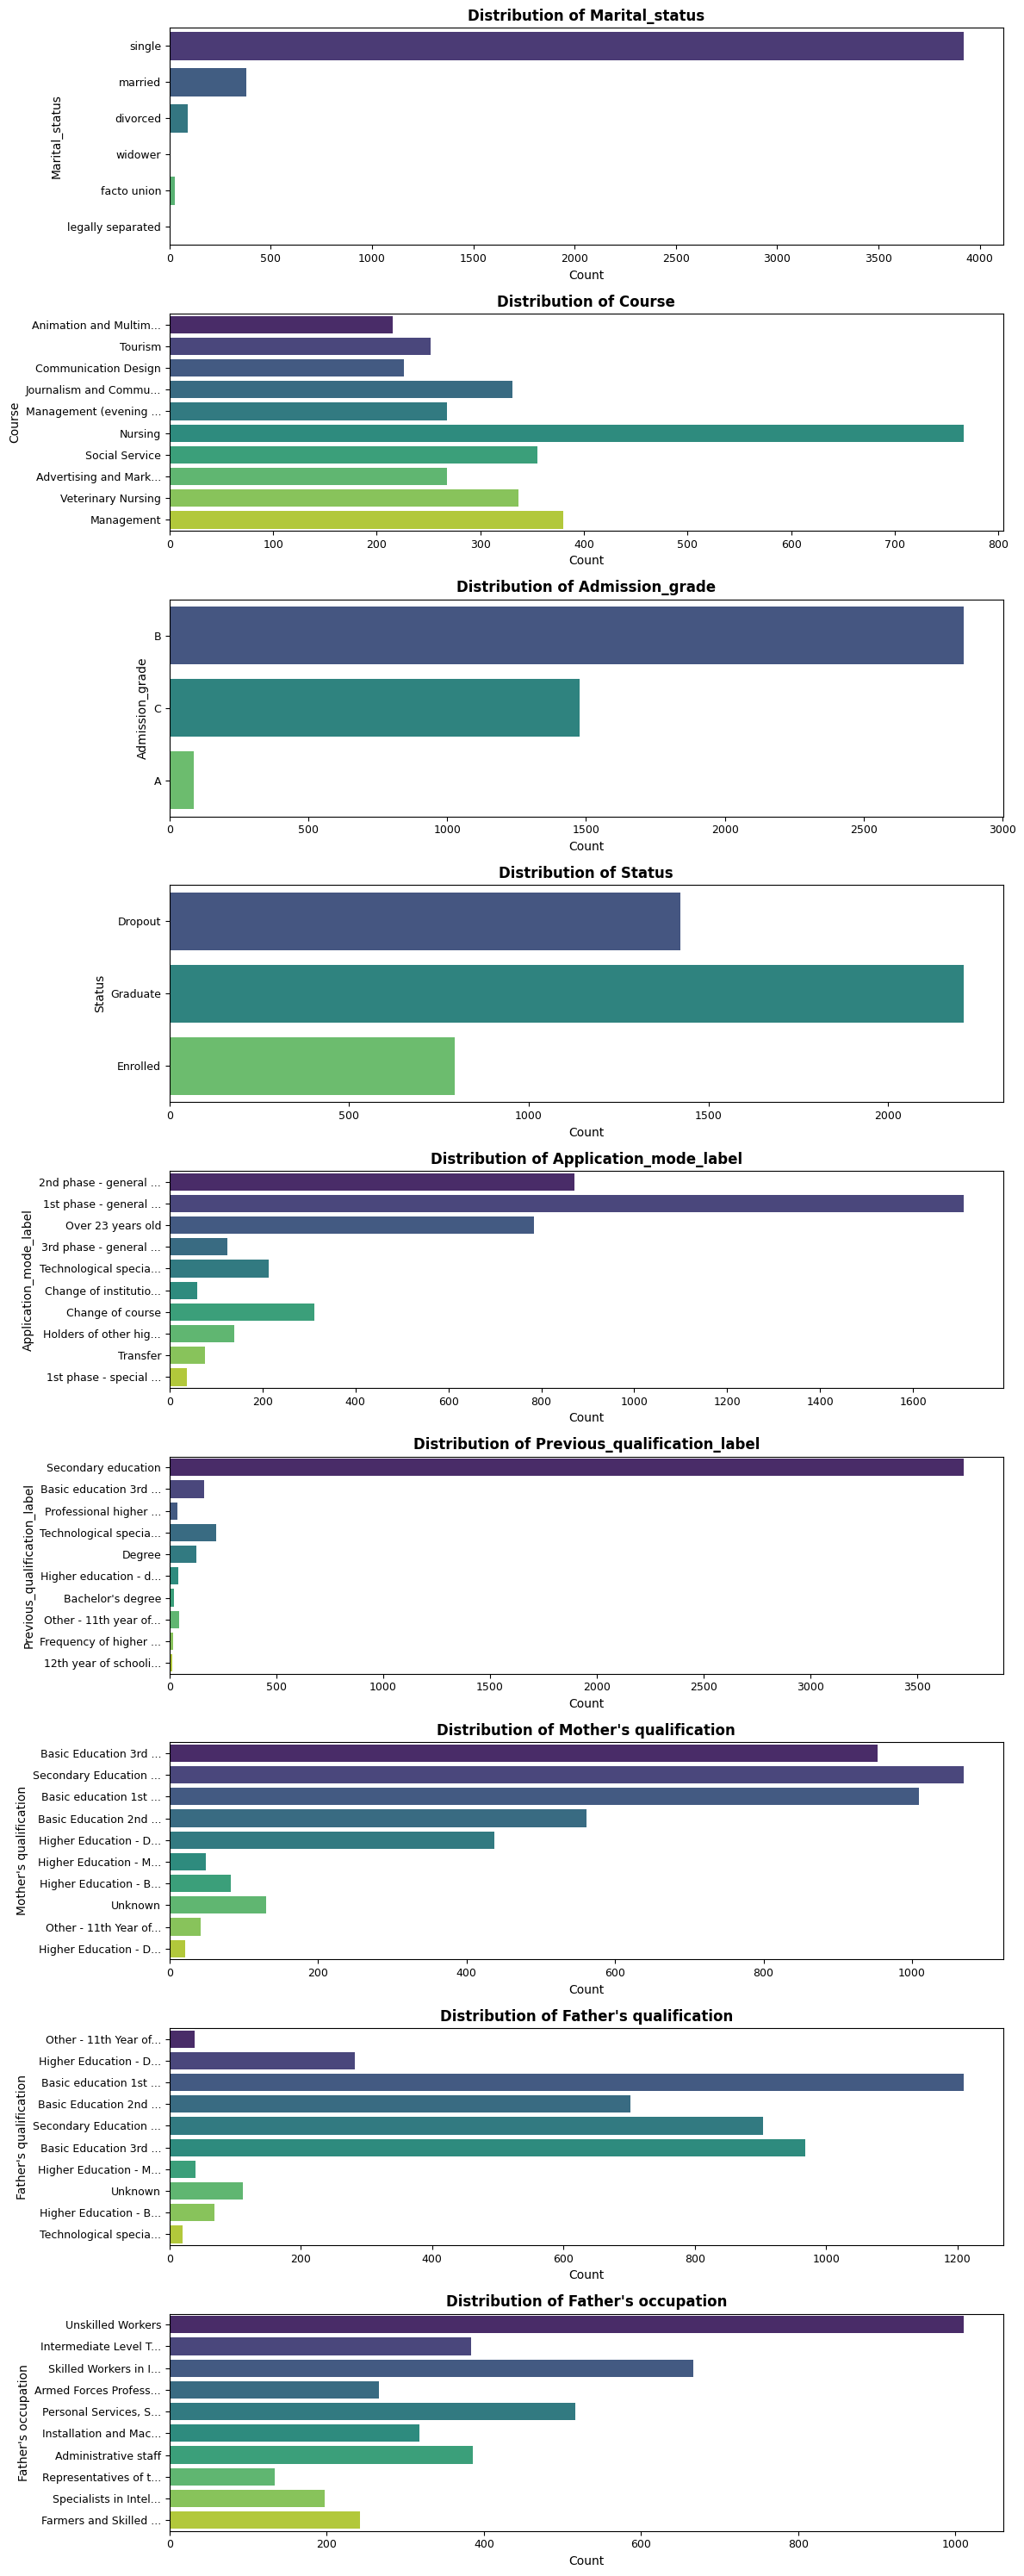

In [ ]:
def shorten_label(label, max_length=20):
    return label if len(label) <= max_length else label[:max_length] + "..."

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(12, 30))
for i, feature in enumerate(categorical_columns):
    # Ambil hanya 10 label teratas berdasarkan jumlah kemunculan
    top_labels = eda_df[feature].value_counts().nlargest(10).index
    filtered_df = eda_df[eda_df[feature].isin(top_labels)]
    
    sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
    ax[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax[i].set_xlabel('Count', fontsize=10)
    ax[i].set_ylabel(feature, fontsize=10)
    ax[i].tick_params(axis='both', labelsize=9)
    
    # Memperpendek label pada sumbu y
    ax[i].set_yticklabels([shorten_label(label.get_text()) for label in ax[i].get_yticklabels()])

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi data untuk setiap fitur kategorikal yang telah dipilih. Berikut adalah beberapa poin penting yang dapat diambil dari grafik:

1. **Distribusi Fitur Kategorikal**:
   - Setiap grafik menampilkan jumlah kemunculan (count) dari setiap kategori dalam fitur tersebut.
   - Hanya 10 kategori teratas yang ditampilkan untuk menjaga visualisasi tetap informatif dan tidak terlalu padat.

2. **Pola dan Tren**:
   - Grafik ini membantu mengidentifikasi pola atau tren dalam data, seperti kategori mana yang paling dominan atau kategori mana yang jarang muncul.
   - Misalnya, fitur `Marital_status` mungkin menunjukkan bahwa sebagian besar siswa berstatus "single" atau "married".

3. **Ketidakseimbangan Data**:
   - Grafik ini juga dapat digunakan untuk mengidentifikasi ketidakseimbangan data dalam fitur kategorikal. Jika ada kategori yang jumlahnya jauh lebih sedikit dibandingkan kategori lainnya, hal ini perlu diperhatikan dalam proses modeling.

4. **Pentingnya Label yang Disingkat**:
   - Label yang panjang telah disingkat untuk menjaga keterbacaan grafik. Hal ini memastikan bahwa visualisasi tetap jelas tanpa mengorbankan informasi penting.

Grafik ini memberikan wawasan awal yang penting untuk memahami distribusi data kategorikal sebelum melanjutkan ke tahap analisis atau modeling lebih lanjut.

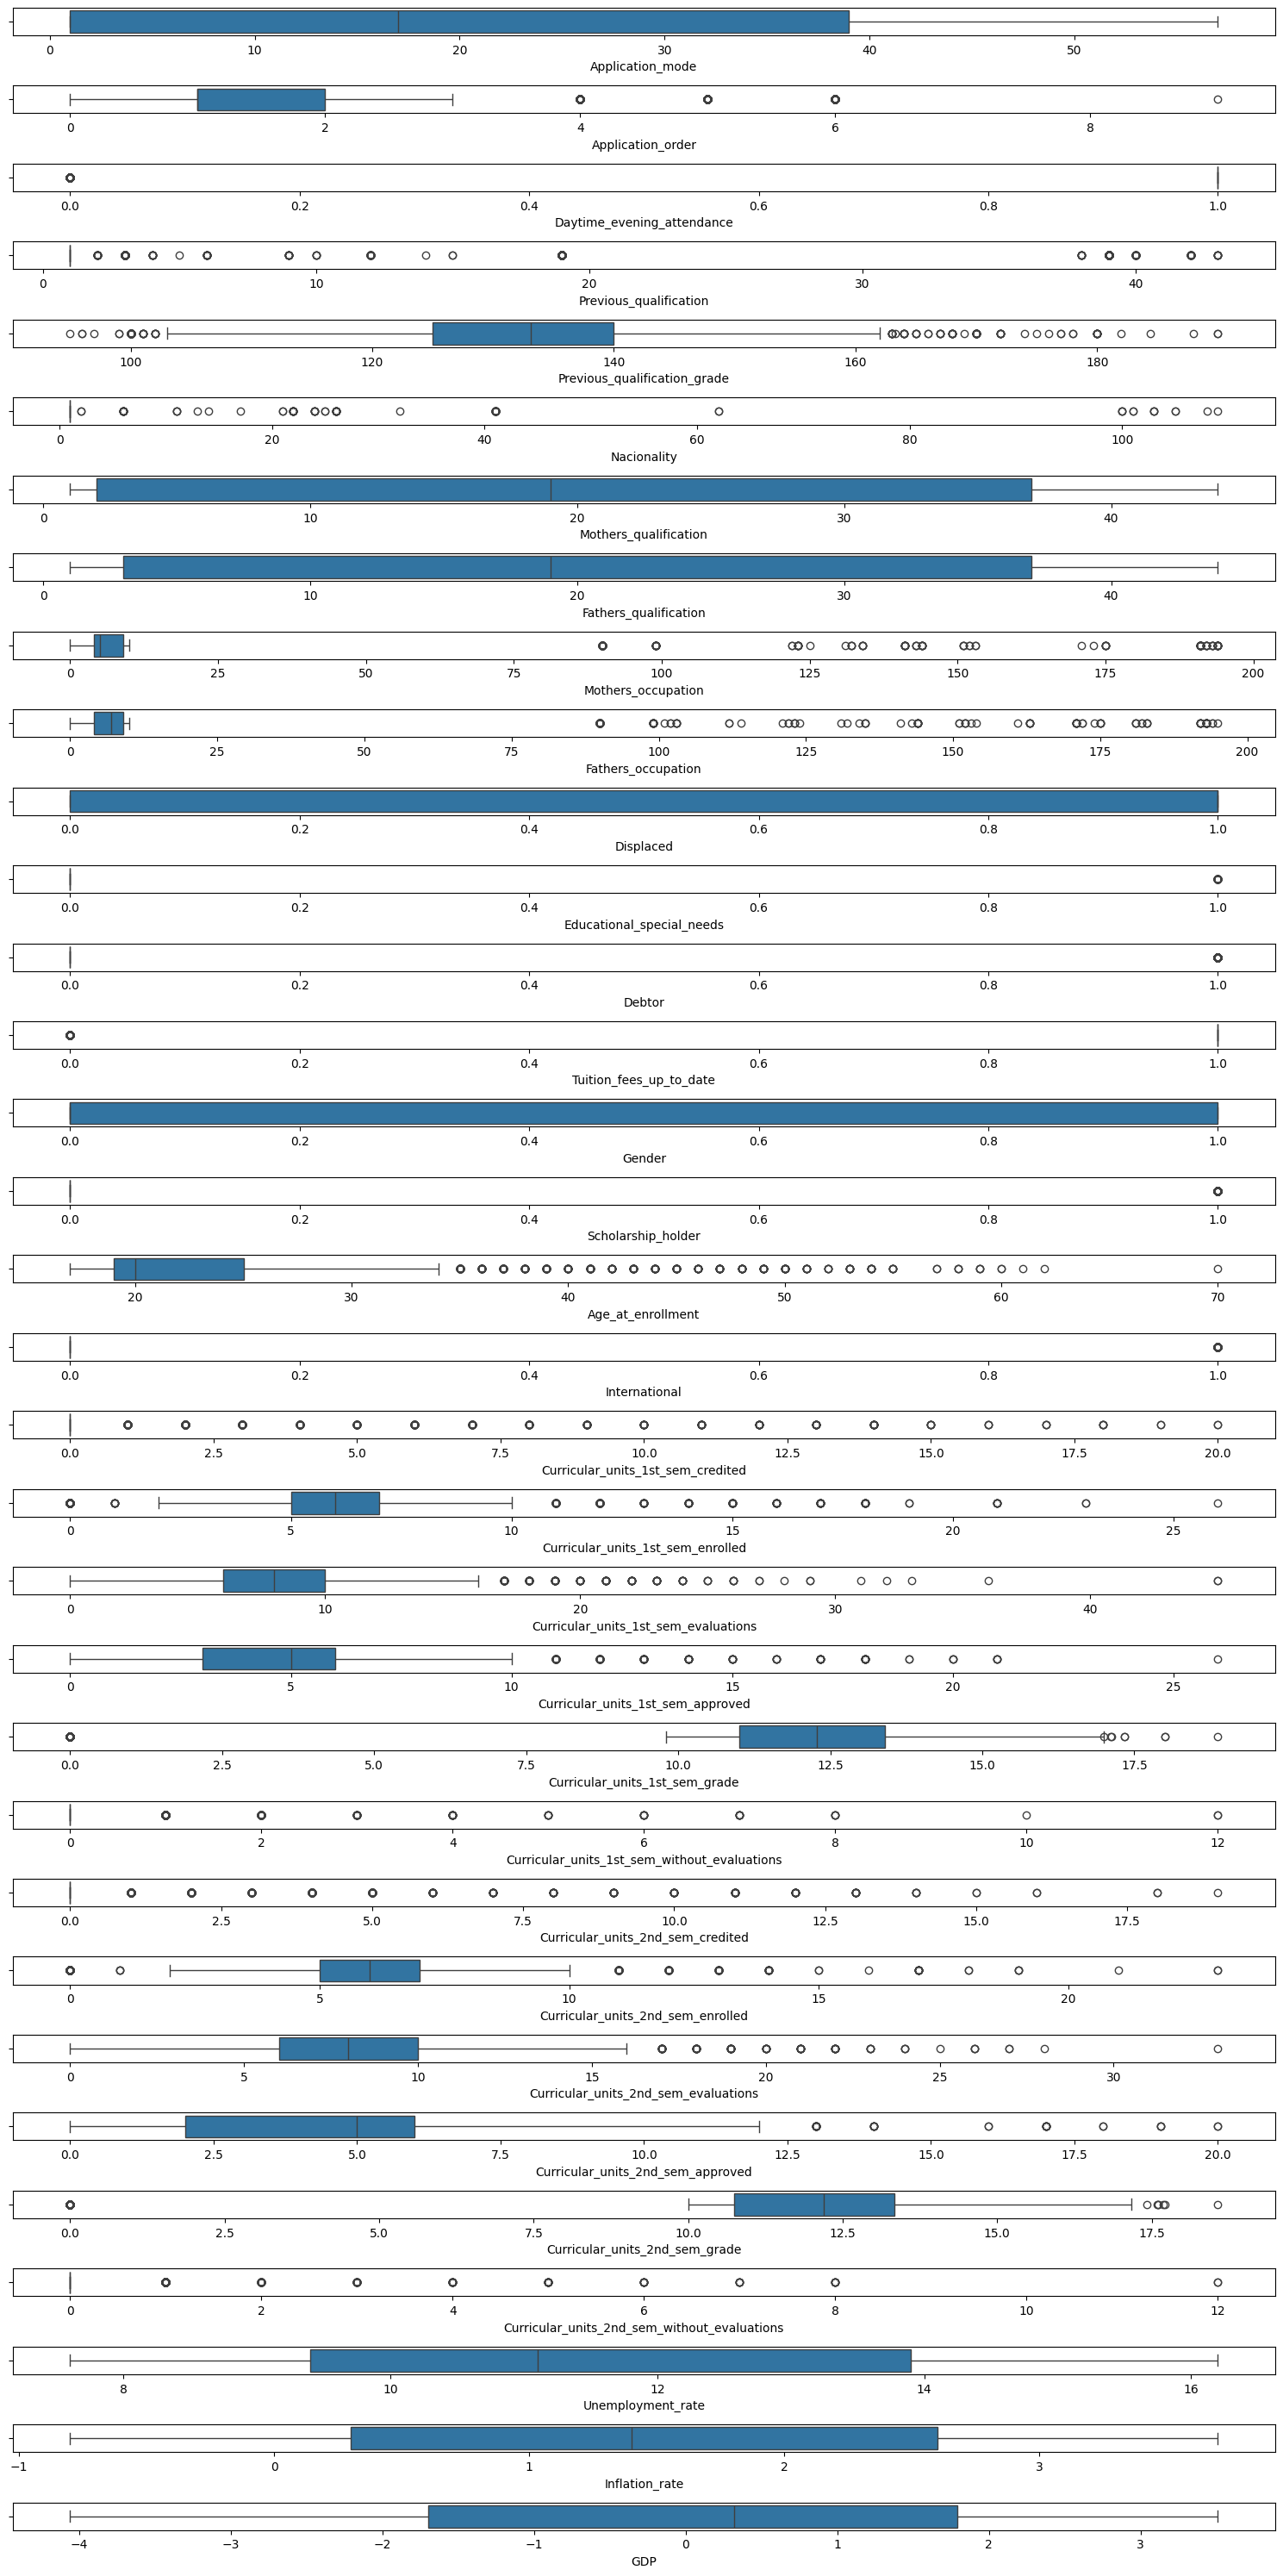

In [20]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()


numerical_dis_plot(
    features=numerical_columns,
    df=eda_df,
)

Grafik di atas menunjukkan distribusi data numerik menggunakan boxplot. Berikut adalah penjelasan dari grafik tersebut:

1. **Distribusi Data Numerik**:
   - Boxplot digunakan untuk memvisualisasikan distribusi data numerik, termasuk median, kuartil pertama (Q1), kuartil ketiga (Q3), serta outlier.
   - Setiap box merepresentasikan rentang interquartile range (IQR), yaitu Q3 - Q1.

2. **Outlier**:
   - Titik-titik di luar whisker (garis vertikal di atas dan bawah box) menunjukkan outlier, yaitu nilai yang jauh dari distribusi utama data.
   - Outlier dapat memberikan informasi penting, seperti adanya data yang tidak biasa atau kesalahan dalam pengumpulan data.

3. **Segmentasi Data**:
   - Jika terdapat fitur segmentasi (misalnya berdasarkan kategori tertentu), boxplot dapat menunjukkan perbedaan distribusi antar segmen.
   - Hal ini membantu dalam memahami bagaimana data numerik bervariasi berdasarkan kategori tertentu.

4. **Pentingnya Visualisasi**:
   - Grafik ini membantu mengidentifikasi pola, tren, atau anomali dalam data numerik.
   - Misalnya, dapat terlihat apakah data memiliki distribusi yang simetris, miring ke kanan/kiri, atau memiliki banyak outlier.

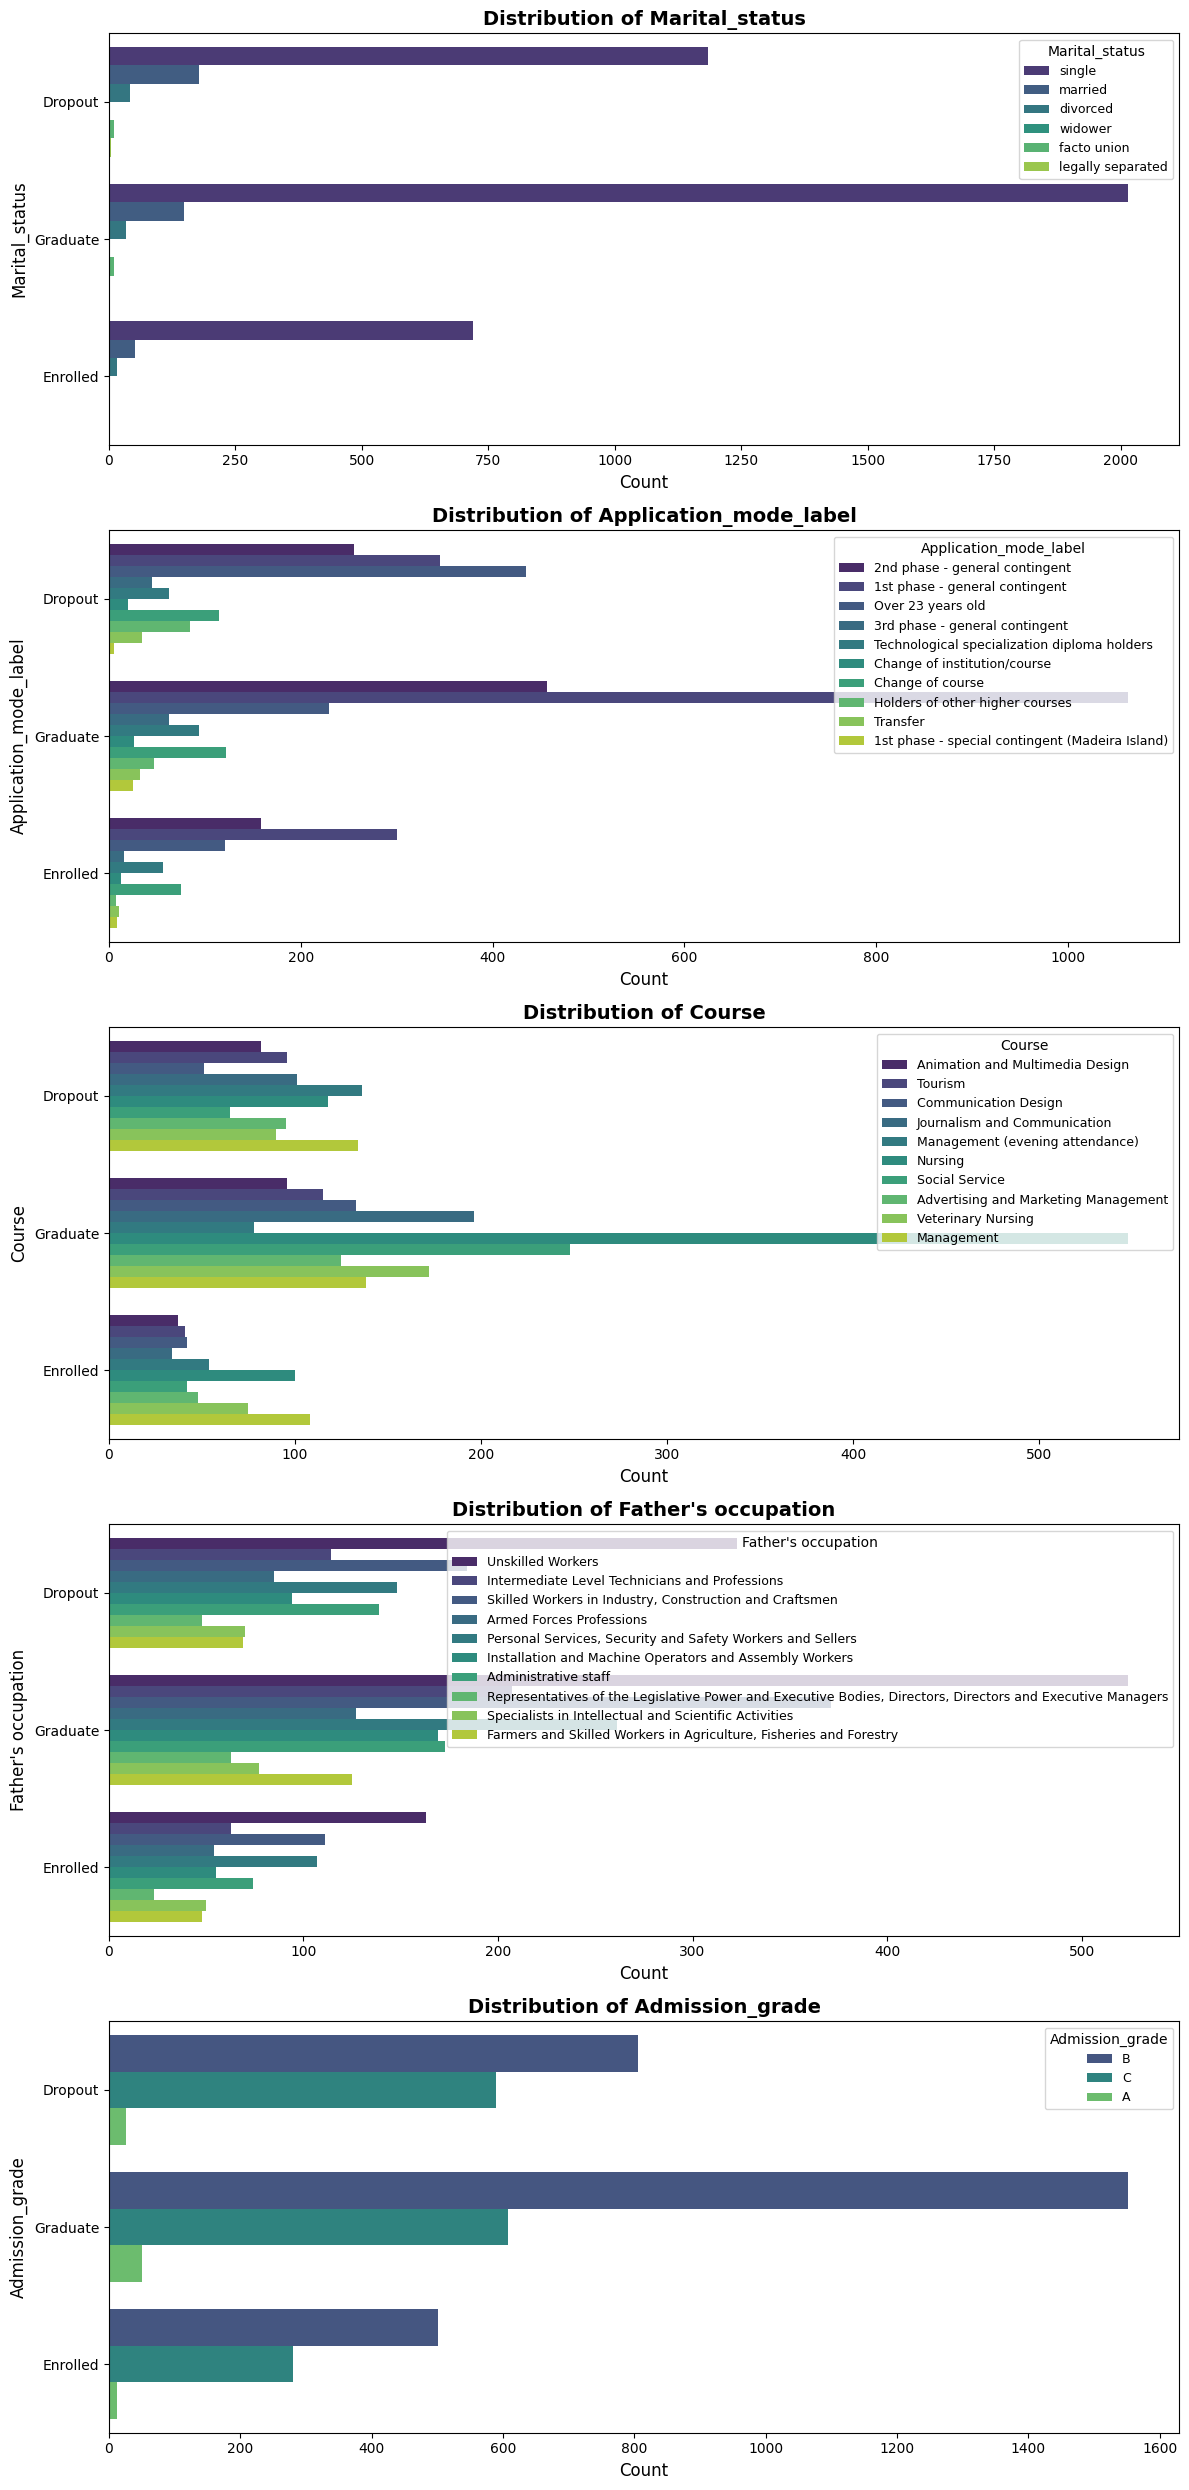

In [21]:
def categorical_plot(features, df, segment_feature=None, max_labels=10):
   fig, ax = plt.subplots(len(features), 1, figsize=(12, 25))
   for i, feature in enumerate(features):
      # Ambil hanya 10 label teratas berdasarkan jumlah kemunculan
      top_labels = df[feature].value_counts().nlargest(max_labels).index
      filtered_df = df[df[feature].isin(top_labels)]
      
      if segment_feature:
         sns.countplot(data=filtered_df, y=segment_feature, hue=feature, ax=ax[i], palette="viridis")
         ax[i].legend(title=feature, loc='upper right', fontsize=9)
      else:
         sns.countplot(data=filtered_df, y=feature, ax=ax[i], palette="viridis")
      
      ax[i].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
      ax[i].set_xlabel('Count', fontsize=12)
      ax[i].set_ylabel(feature, fontsize=12)
      ax[i].tick_params(axis='both', labelsize=10)
   
   plt.tight_layout()
   plt.show()

categorical_plot(
   features=[
      'Marital_status',
      'Application_mode_label',
      'Course',
      "Father's occupation",
      'Admission_grade',
   ],
   df=eda_df,
   segment_feature="Status"
)

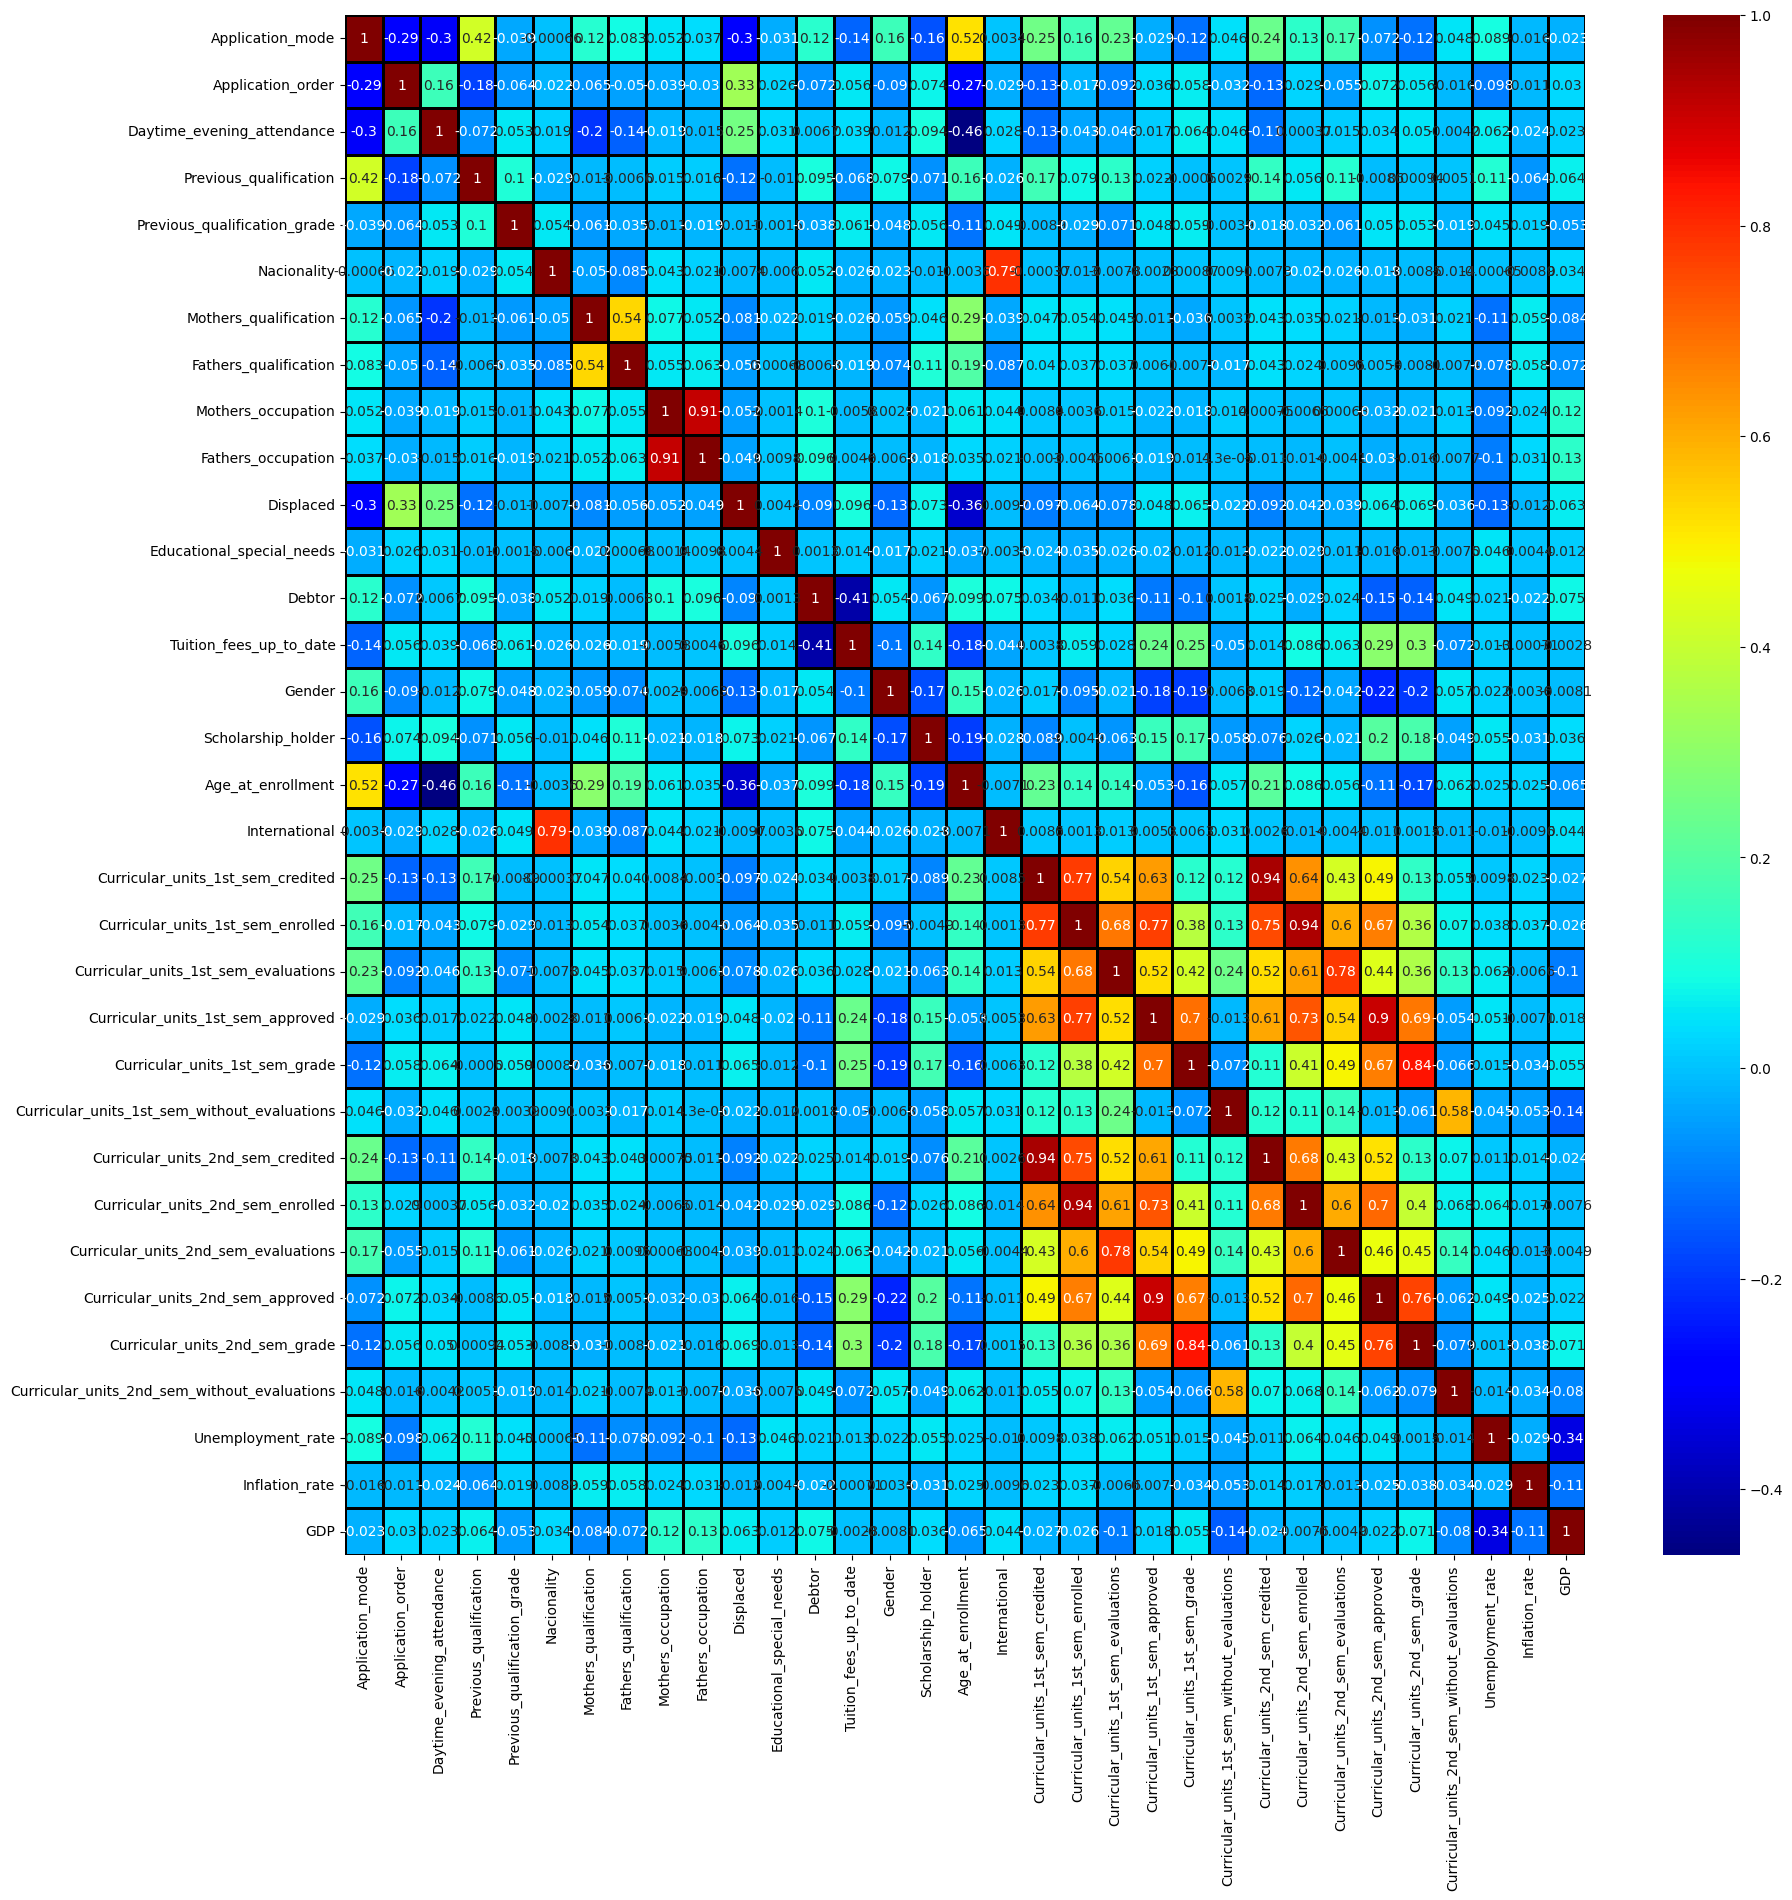

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(eda_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

Heatmap di atas menunjukkan korelasi antara fitur-fitur numerik dalam dataset. Berikut adalah beberapa poin penting yang dapat diambil dari heatmap tersebut:

1. **Korelasi Antar Fitur**:
   - Nilai korelasi berkisar antara -1 hingga 1.
   - Nilai mendekati 1 menunjukkan korelasi positif yang kuat (ketika satu fitur meningkat, fitur lainnya juga meningkat).
   - Nilai mendekati -1 menunjukkan korelasi negatif yang kuat (ketika satu fitur meningkat, fitur lainnya menurun).
   - Nilai mendekati 0 menunjukkan tidak adanya korelasi linear antara fitur-fitur tersebut.

2. **Pentingnya Korelasi**:
   - Korelasi yang tinggi antara dua fitur dapat menunjukkan redundansi, sehingga salah satu fitur mungkin dapat dihapus untuk mengurangi multikolinearitas.
   - Korelasi dengan target (jika target termasuk dalam heatmap) dapat memberikan wawasan tentang fitur mana yang lebih relevan untuk prediksi.

3. **Penggunaan dalam Modeling**:
   - Informasi dari heatmap ini dapat digunakan untuk memilih fitur yang paling relevan atau untuk mengidentifikasi fitur yang perlu diubah atau dihapus.

Heatmap ini membantu dalam memahami hubungan antar fitur numerik dalam dataset, yang merupakan langkah penting dalam analisis data dan persiapan untuk modeling.

## Data Preparation / Preprocessing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Data Cleansing

Berdasarkan heatmap diatas kita perlu menghapus beberapa kolom yang tidak relevan, berikut beberapa kolom yang dihapus

In [24]:
df.drop(columns=[
   'Nacionality', 
   'Mothers_qualification', 
   'Fathers_qualification', 
   'Tuition_fees_up_to_date', 
   'Gender', 
   'Curricular_units_1st_sem_credited',
   'Curricular_units_1st_sem_without_evaluations',
   'Curricular_units_2nd_sem_credited',
   'Curricular_units_2nd_sem_without_evaluations',
   'Inflation_rate',
   'Unemployment_rate',
   'GDP'], inplace=True)

In [25]:
df.isna().sum()

Marital_status                          0
Application_mode                        0
Application_order                       0
Course                                  0
Daytime_evening_attendance              0
Previous_qualification                  0
Previous_qualification_grade            0
Mothers_occupation                      0
Fathers_occupation                      0
Admission_grade                         0
Displaced                               0
Educational_special_needs               0
Debtor                                  0
Scholarship_holder                      0
Age_at_enrollment                       0
International                           0
Curricular_units_1st_sem_enrolled       0
Curricular_units_1st_sem_evaluations    0
Curricular_units_1st_sem_approved       0
Curricular_units_1st_sem_grade          0
Curricular_units_2nd_sem_enrolled       0
Curricular_units_2nd_sem_evaluations    0
Curricular_units_2nd_sem_approved       0
Curricular_units_2nd_sem_grade    

In [26]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_occupation,Fathers_occupation,Admission_grade,...,Age_at_enrollment,International,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,10.960895,11.032324,126.978119,...,23.265145,0.024864,6.270570,8.299051,4.706600,10.640822,6.232143,8.063291,4.435805,10.230206
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,26.418253,25.263040,14.482001,...,7.587816,0.155729,2.480178,4.179106,3.094238,4.843663,2.195951,3.947951,3.014764,5.210808
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,0.000000,0.000000,95.000000,...,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,4.000000,4.000000,117.900000,...,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.750000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,5.000000,7.000000,126.100000,...,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,6.000000,8.000000,5.000000,12.200000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,9.000000,9.000000,134.800000,...,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,7.000000,10.000000,6.000000,13.333333
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,194.000000,195.000000,190.000000,...,70.000000,1.000000,26.000000,45.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429


In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(col)
    print(df[col].value_counts())
    print()

Status
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64



In [28]:
df[categorical_columns].isna().sum()

Status    0
dtype: int64

### OverSampling

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16516\2727185020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Status", palette="viridis")


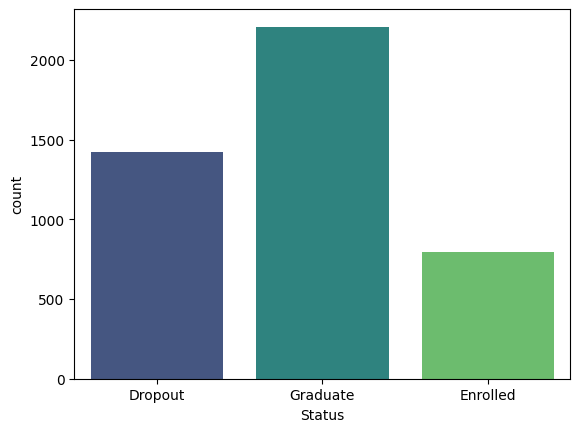

In [29]:
sns.countplot(data=df, x="Status", palette="viridis")
plt.show()

Kita bisa lihat data didominasi oleh status **Graduate** dengan selisih antar dua status lainnya lumayan jauh. Oleh karena itu langkah terbaik yang dilakukan adalah menambahkan dataset untuk kedua status yaitu `Dropout` dan `Enrolled` menggunakan teknik oversampling

In [30]:
df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [31]:
df_majority_1 = df[df['Status'] == 'Graduate']
df_majority_2 = df[df['Status'] == 'Dropout']
df_minority = df[df['Status'] == 'Enrolled']

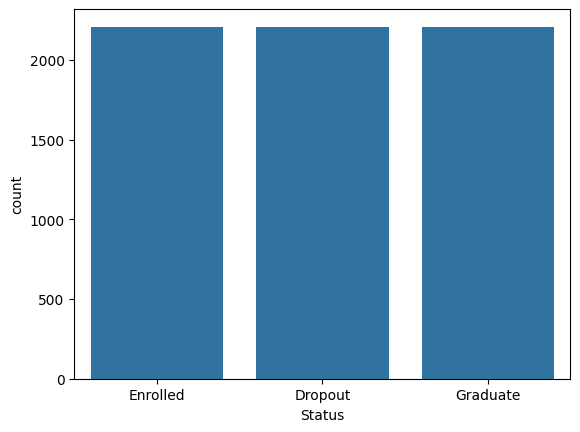

In [ ]:
df_majority_2_undersampled = resample(df_majority_2, n_samples=2209, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=2209, random_state=42)

# Menggabungkan data Graduated tanpa perubahan
oversampled_df = pd.concat([df_majority_1, df_majority_2_undersampled, df_minority_undersampled]).reset_index(drop=True)

# Shuffle data
oversampled_df = shuffle(oversampled_df, random_state=42)
oversampled_df.reset_index(drop=True, inplace=True)

# Visualisasi distribusi
sns.countplot(data=oversampled_df, x="Status")
plt.show()

Dataset menjadi sama antar ketiga status

In [33]:
oversampled_df.Status.value_counts()

Status
Enrolled    2209
Dropout     2209
Graduate    2209
Name: count, dtype: int64

In [34]:
df = oversampled_df.copy()

### Encoding

In [ ]:
# Encode kolom target (multiclass)
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])  # Dropout=0, Enrolled=1, Graduate=2

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marital_status                        6627 non-null   int64  
 1   Application_mode                      6627 non-null   int64  
 2   Application_order                     6627 non-null   int64  
 3   Course                                6627 non-null   int64  
 4   Daytime_evening_attendance            6627 non-null   int64  
 5   Previous_qualification                6627 non-null   int64  
 6   Previous_qualification_grade          6627 non-null   float64
 7   Mothers_occupation                    6627 non-null   int64  
 8   Fathers_occupation                    6627 non-null   int64  
 9   Admission_grade                       6627 non-null   float64
 10  Displaced                             6627 non-null   int64  
 11  Educational_speci

In [37]:
target_col = 'Status'

# Pisahkan fitur numerik dan kategorikal (tanpa target)
categorical_cols = df.select_dtypes(include=['object']).columns.drop(target_col, errors='ignore')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_col, errors='ignore')

In [38]:
categorical_cols

Index([], dtype='object')

In [39]:
numerical_cols

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Mothers_occupation',
       'Fathers_occupation', 'Admission_grade', 'Displaced',
       'Educational_special_needs', 'Debtor', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'],
      dtype='object')

In [40]:
# One-hot encoding untuk kategori
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [41]:
df_encoded

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_occupation,Fathers_occupation,Admission_grade,...,International,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,1,43,1,9500,1,1,140.0,9,7,125.7,...,0,7,8,5,11.200000,7,8,5,11.200000,1
1,1,16,2,9147,1,1,132.0,9,9,122.6,...,0,5,8,3,12.000000,5,9,4,12.625000,1
2,1,39,1,8014,0,1,100.0,99,99,100.0,...,0,6,0,0,0.000000,6,0,0,0.000000,0
3,1,1,2,9147,1,1,116.0,5,3,124.8,...,0,5,9,2,14.333333,5,10,2,12.500000,1
4,1,17,2,9254,1,1,118.0,5,7,121.2,...,0,6,12,3,10.666667,6,9,4,12.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1,44,1,171,1,39,110.0,1,7,114.2,...,0,0,0,0,0.000000,0,0,0,0.000000,0
6623,1,43,1,8014,0,1,120.0,5,4,118.3,...,0,6,6,6,12.166667,6,7,5,14.000000,1
6624,1,17,3,9147,1,1,137.0,4,7,124.4,...,0,5,5,5,12.600000,5,5,4,11.000000,1
6625,1,1,1,9238,1,1,132.0,9,7,129.9,...,0,6,7,5,13.200000,6,6,6,12.666667,1


In [ ]:
joblib.dump(le, "model/label_encoder.joblib")

['model/label_encoder.joblib']

### Split Data

In [ ]:
# Split fitur dan target
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5301, 24), (1326, 24), (5301,), (1326,))

## Modeling

In [ ]:
# Model RandomForest
rdf_model = RandomForestClassifier(random_state=123)

# Parameter grid
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", CV_rdf.best_params_)

d:\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Programs\Python\Python3

Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
rdf_model = RandomForestClassifier(
      n_estimators=CV_rdf.best_params_['n_estimators'],
      max_features=CV_rdf.best_params_['max_features'],
      max_depth=CV_rdf.best_params_['max_depth'],
      criterion=CV_rdf.best_params_['criterion'],
      random_state=123
)
rdf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=123)

## Evaluation

In [47]:
# Evaluasi
y_pred = rdf_model.predict(X_test)


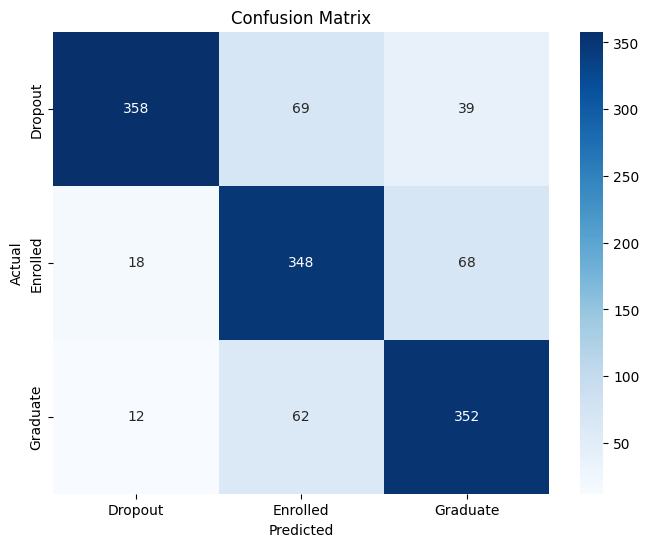

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

     Dropout       0.92      0.77      0.84       466
    Enrolled       0.73      0.80      0.76       434
    Graduate       0.77      0.83      0.80       426

    accuracy                           0.80      1326
   macro avg       0.81      0.80      0.80      1326
weighted avg       0.81      0.80      0.80      1326



Model berhasil mendapatkan akurasi yang bagus yaitu 80%

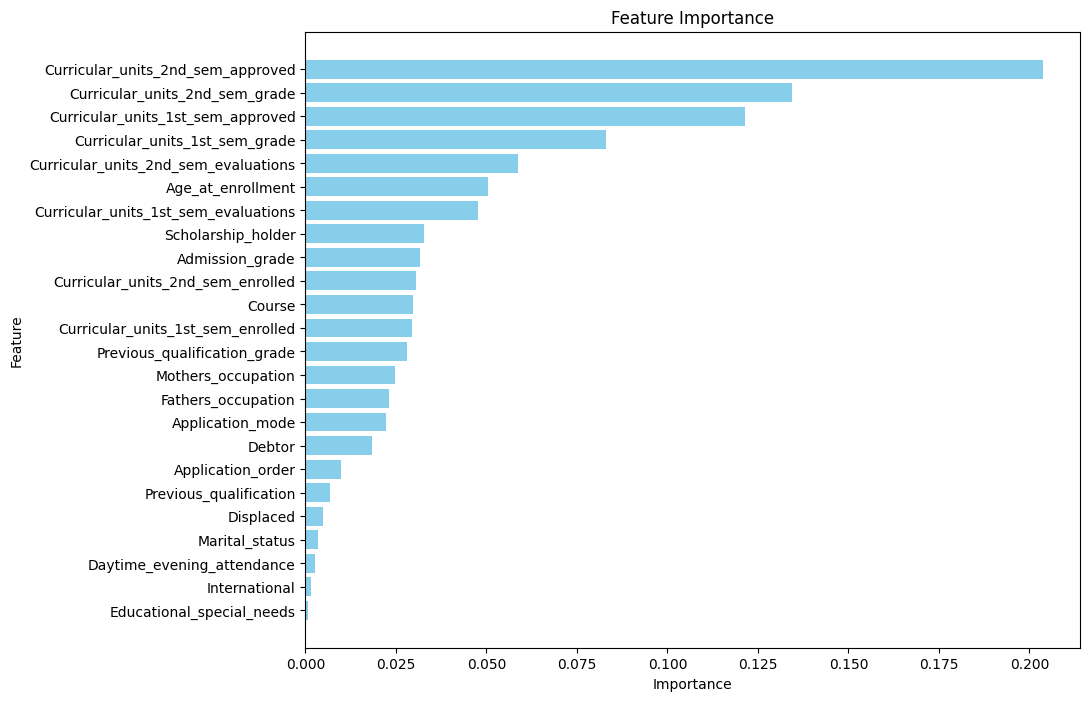

In [ ]:
# Mendapatkan feature importance dari model
feature_importances = rdf_model.feature_importances_

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
   'Feature': X.columns,
   'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar fitur dengan importance tertinggi berada di atas
plt.show()

In [ ]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

In [52]:
rdf_model.feature_names_in_

array(['Marital_status', 'Application_mode', 'Application_order',
       'Course', 'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Mothers_occupation',
       'Fathers_occupation', 'Admission_grade', 'Displaced',
       'Educational_special_needs', 'Debtor', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved',
       'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved',
       'Curricular_units_2nd_sem_grade'], dtype=object)

In [53]:
# Mendapatkan nama fitur dari model
features = rdf_model.feature_names_in_

# Mendapatkan tipe data dari fitur-fitur tersebut
feature_types = {feature: X[feature].dtype for feature in features}
feature_types

{'Marital_status': dtype('int64'),
 'Application_mode': dtype('int64'),
 'Application_order': dtype('int64'),
 'Course': dtype('int64'),
 'Daytime_evening_attendance': dtype('int64'),
 'Previous_qualification': dtype('int64'),
 'Previous_qualification_grade': dtype('float64'),
 'Mothers_occupation': dtype('int64'),
 'Fathers_occupation': dtype('int64'),
 'Admission_grade': dtype('float64'),
 'Displaced': dtype('int64'),
 'Educational_special_needs': dtype('int64'),
 'Debtor': dtype('int64'),
 'Scholarship_holder': dtype('int64'),
 'Age_at_enrollment': dtype('int64'),
 'International': dtype('int64'),
 'Curricular_units_1st_sem_enrolled': dtype('int64'),
 'Curricular_units_1st_sem_evaluations': dtype('int64'),
 'Curricular_units_1st_sem_approved': dtype('int64'),
 'Curricular_units_1st_sem_grade': dtype('float64'),
 'Curricular_units_2nd_sem_enrolled': dtype('int64'),
 'Curricular_units_2nd_sem_evaluations': dtype('int64'),
 'Curricular_units_2nd_sem_approved': dtype('int64'),
 'Curricu